In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1,as_frame= False)


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
""""Datasets loaded by Scikit-Learn generally have a similar dictionary structure includ‐
ing:"""

#DESCR: key describing the dataset
# data: key containing an array with one row per instance and one column per feature
#target:A key containing an array with the lables

'"Datasets loaded by Scikit-Learn generally have a similar dictionary structure includ‐\ning:'

In [5]:
print(type(mnist))

<class 'sklearn.utils.Bunch'>


In [6]:
X,y=mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [7]:
28*28

784

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
some_digit=X[0]
print(some_digit.shape)
some_digit_image=some_digit.reshape(28,28)
print(some_digit_image.shape)

(784,)
(28, 28)


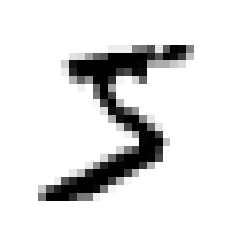

In [10]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [11]:
y[0]

'5'

In [12]:
y=y.astype(int)
y

array([5, 0, 4, ..., 4, 5, 6])

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [15]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [17]:
import numpy as np
t=np.random.permutation(100)
print(len(t))
t

100


array([98, 85, 14, 53,  5,  6, 90, 58, 86,  4, 71, 95,  8, 96, 48, 80, 10,
       42, 41,  2, 29, 39,  7,  1, 19, 20, 55,  0, 87, 89, 21, 61, 74, 69,
       31, 56, 94, 25, 67, 93, 77, 64, 46, 52, 63, 18, 47, 32, 40, 70, 44,
       92, 82, 84, 88, 91, 79, 72, 45, 34, 73, 59, 11, 38, 22, 78, 37, 66,
       97, 12, 62, 33, 81, 16, 49, 50, 57, 35, 30, 24, 36, 28,  3, 26, 15,
       65, 83, 27, 43, 99,  9, 76, 54, 17, 68, 60, 51, 13, 75, 23])

In [18]:
# shuffling is important to ensure that all cross-validation sets are similar
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]   

In [19]:
# Training a binary classifier
y_train_5 = (y_train == 5)

In [20]:
print(y_train.shape)
print(y_train_5.shape)

(60000,)
(60000,)


In [21]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [23]:
skfolds = StratifiedKFold(n_splits=3)
print(type(skfolds))
skfolds

<class 'sklearn.model_selection._split.StratifiedKFold'>


StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [24]:
print(skfolds.split(X_train, y_train_5))

<generator object _BaseKFold.split at 0x00000250A4424C80>


In [25]:
test=[]
for i,j in skfolds.split(X_train, y_train_5):
    print('**************')
    print(type(i),len(i),i)
    print(type(j),len(j),j)
    test.append(j)
    print('**************')
print(len(test))

**************
<class 'numpy.ndarray'> 40000 [19725 19729 19741 ... 59997 59998 59999]
<class 'numpy.ndarray'> 20000 [    0     1     2 ... 20021 20023 20024]
**************
**************
<class 'numpy.ndarray'> 40000 [    0     1     2 ... 59997 59998 59999]
<class 'numpy.ndarray'> 20000 [19725 19729 19741 ... 40047 40061 40067]
**************
**************
<class 'numpy.ndarray'> 40000 [    0     1     2 ... 40047 40061 40067]
<class 'numpy.ndarray'> 20000 [39992 39993 39994 ... 59997 59998 59999]
**************
3


In [26]:
a=[item for item in test[0] if item in test[2]]
print(len(a))

0


In [27]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
     clone_clf = clone(sgd_clf)
     X_train_folds = X_train[train_index]
     y_train_folds = (y_train_5[train_index])
     X_test_fold = X_train[test_index]
     y_test_fold = (y_train_5[test_index])
     clone_clf.fit(X_train_folds, y_train_folds)
     y_pred = clone_clf.predict(X_test_fold)
     n_correct = sum(y_pred == y_test_fold)
     print(n_correct / len(y_pred))

0.9369
0.96285
0.96845


In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9369 , 0.96285, 0.96845])

In [29]:
from sklearn.base import BaseEstimator

In [30]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
                                            


In [31]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9086 , 0.91105, 0.9093 ])

In [32]:
# confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [33]:
y_train_pred

array([False,  True, False, ..., False, False, False])

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53170,  1409],
       [ 1227,  4194]], dtype=int64)

In [35]:
print(y_train_5.shape)
print(y_pred.shape)

(60000,)
(20000,)


In [36]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(y_train_5, y_train_pred))
print('Recall:',recall_score(y_train_5, y_train_pred))
    


Precision: 0.7485275745136534
Recall: 0.7736579966795795


In [37]:
# F1 Score
from sklearn.metrics import f1_score
print('f1_score:',f1_score(y_train_5, y_train_pred))


f1_score: 0.7608853410740204


In [ ]:
# difference between predict() & decision_function() of a classifier

#predict(): is used to obtain the predicted class label of a data point
# decision_function():  is used to obtain a score or decision value indicating the confidence of the classifier in its prediction.

#For example, in a binary classification problem, a positive value of the decision function indicates that the classifier is more confident that the data point belongs to the positive class, while a negative value indicates that the classifier is more confident that the data point belongs to the negative class.

# decision_function() is more usefull for multiclass_classification.

In [38]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4381.67967841])

In [39]:
threshold=200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [40]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [41]:
y_scores

array([ -3038.9719912 ,    139.03271111, -11478.50125728, ...,
       -14997.98678155,  -8656.43131226, -14529.89794979])

In [42]:
y_train_5

array([False, False, False, ..., False, False, False])

In [43]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [44]:
print(len(precisions),len(recalls),len(thresholds),len(y_train_5),len(y_scores))

59928 59928 59927 60000 60000


In [45]:
thresholds

array([-76142.54946793, -75990.73952918, -75885.43783943, ...,
        25648.13650861,  28794.91354273,  29272.16989661])

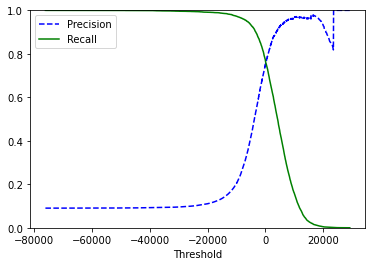

In [46]:
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="upper left")
 plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [47]:
y_train_pred_90 = (y_scores > 7000)                         # if you want precision more than 90 
print(len(y_train_pred_90))
print(sum(y_train_pred_90))
y_train_pred_90


60000
1784


array([False, False, False, ..., False, False, False])

In [48]:
#Let’s check these predictions’ precision and recall:
print('precision:',precision_score(y_train_5, y_train_pred_90))
print('recall:',recall_score(y_train_5, y_train_pred_90))

precision: 0.9501121076233184
recall: 0.3126729385722192


In [49]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [50]:
print(len(fpr),fpr)
print('***********')
print(len(tpr),tpr)
print('***********')
print(len(thresholds),thresholds)

3796 [0.         0.         0.         ... 0.99868081 0.99868081 1.        ]
***********
3796 [0.00000000e+00 1.84467810e-04 1.66021029e-03 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00]
***********
3796 [  29273.16989661   29272.16989661   23664.31055167 ...  -75990.73952918
  -76142.54946793 -124143.46047058]


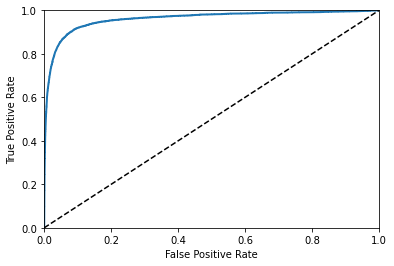

In [51]:
# plot roc_curve
# Roc curve is a plot between (TPR vs FPR)/(Recall vs 1-specificity)/(TPR vs 1-TNR)
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [52]:
'''The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that 
line as possible (towardthe top-left corner).'''

#AUC: Area under the curve
#A per‐fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

'The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that \nline as possible (towardthe top-left corner).'

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9606506694318553

In [54]:
# lets try out random forest classifier 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")


In [97]:
'''The output y_pred_proba is an array of predicted probabilities for each class label for each data point in the input dataset, using the specified RandomForestClassifier model and cross-validation method.''' 

'The output y_pred_proba is an array of predicted probabilities for each class label for each data point in the input dataset, using the specified RandomForestClassifier model and cross-validation method.'

In [96]:
y_probas_forest.shape

(60000, 2)

In [95]:
y_probas_forest

array([[0.96, 0.04],
       [0.05, 0.95],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [ ]:
'''But to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positive class’s probability as the score'''

In [98]:
y_scores_forest = y_probas_forest[:, 1]                # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

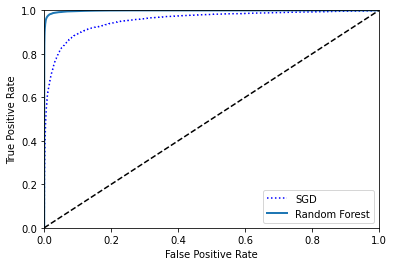

In [100]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [101]:
'''the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better:'''

print('roc auc score of random forest classifier:',roc_auc_score(y_train_5, y_scores_forest))


roc auc score of random forest classifier: 0.9983185035294175


In [102]:
'''Try measuring the precision and recall scores: you should find 98.5% precision and
82.8% recall. Not too bad!'''

'Try measuring the precision and recall scores: you should find 98.5% precision and\n82.8% recall. Not too bad!'

In [ ]:
# Multiclass classification

'''
Binary classifiers: Logistic Regression, SVM classifier
Multiclass classifiers: SGD Classifier,Random Forest Classifier,Naive Bayes classifers
'''